In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from IPython.display import Image

## 1. 
Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

In [4]:
credit_df = pd.read_table("australian.dat", sep=" ",header=None)

In [5]:
credit_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
credit_df.value_counts()

0  1      2      3  4   5  6      7  8  9  10  11  12   13   14
1  80.25  5.500  2  8   4  0.540  1  0  0  0   2   0    341  0     1
   16.17  0.040  2  8   4  0.040  0  0  0  0   2   0    1    1     1
   17.08  0.250  2  11  4  0.335  0  1  4  0   2   160  9    0     1
          0.085  1  8   4  0.040  0  0  0  0   2   140  723  0     1
   16.92  0.335  1  4   4  0.290  0  0  0  0   1   200  1    0     1
                                                                  ..
   29.83  3.500  2  8   4  0.165  0  0  0  0   2   216  1    0     1
          2.040  1  14  8  0.040  0  0  0  0   2   128  2    0     1
          1.250  1  4   4  0.250  0  0  0  0   2   224  1    0     1
   29.67  1.415  2  9   8  0.750  1  1  1  0   2   240  101  1     1
0  15.75  0.375  2  8   4  1.000  0  0  0  0   2   120  19   0     1
Length: 690, dtype: int64

In [7]:
credit_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [8]:
#Method 1 - we can remove missing data. This method is not very helpful here because this dataset has no null values.
credit_df.dropna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [9]:
#checking for null values
credit_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [10]:
#method 2 making sure all columns are integers
credit_df.astype("int64")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22,11,2,4,4,1,0,0,0,1,2,100,1213,0
1,0,22,7,2,8,4,0,0,0,0,0,2,160,1,0
2,0,29,1,1,4,4,1,0,0,0,1,2,280,1,0
3,0,21,11,1,5,3,0,1,1,11,1,2,0,1,1
4,1,20,8,2,6,4,1,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31,10,2,14,4,6,1,0,0,0,2,0,1,1
686,1,20,0,2,8,4,0,0,0,0,0,2,0,45,0
687,0,18,9,2,6,4,0,1,0,0,0,2,100,1,1
688,0,27,14,2,14,8,3,1,1,1,0,2,120,12,1


In [11]:
from sklearn.model_selection import train_test_split

X = credit_df.drop(14,axis = 1)
y = credit_df[14]

#when we set stratify parameter to y it helps make the sampling more accurate whne the classes sampling is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [12]:
#printing value counts for both y_train and y_test helps us better understand how the data is distributed
print(y_train.value_counts())
print(y_test.value_counts())

0    287
1    230
Name: 14, dtype: int64
0    96
1    77
Name: 14, dtype: int64


Since our dataset contains all numerical values, we will use log normalization and scaling techniques to preprocess the data. These methods typically work best with the numerical data

In [13]:
#claculaying variance for all columns to see whcih columns we might want to standardize
credit_df.var()

0     2.185398e-01
1     1.405001e+02
2     2.478211e+01
3     1.849540e-01
4     1.356644e+01
5     3.969323e+00
6     1.119915e+01
7     2.498244e-01
8     2.451042e-01
9     2.364819e+01
10    2.485938e-01
11    8.928925e-02
12    2.963882e+04
13    2.714517e+07
14    2.473255e-01
dtype: float64

In [14]:
#applying log normalization to column 11 since its variance is significantly higher than the other columns.
credit_df["11_normalized"] = np.log(credit_df[11])

In [15]:
credit_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,11_normalized
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0,0.693147
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0,0.693147
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0,0.693147
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1,0.693147
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1,0.693147
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0,0.693147
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1,0.693147
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1,0.693147


In [16]:
#now we can see that 11_normalized column's variance is significantly lower than the original column 11
credit_df.var()

0                2.185398e-01
1                1.405001e+02
2                2.478211e+01
3                1.849540e-01
4                1.356644e+01
5                3.969323e+00
6                1.119915e+01
7                2.498244e-01
8                2.451042e-01
9                2.364819e+01
10               2.485938e-01
11               8.928925e-02
12               2.963882e+04
13               2.714517e+07
14               2.473255e-01
11_normalized    3.888963e-02
dtype: float64

In [356]:
#droping the original column 11 with high variance since now we can use the normalized data for that column
# which is in 11_normalized column
normalized_df = credit_df.drop([11], axis=1)

In [357]:
normalized_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,12,13,14,11_normalized
0,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,0.058595,0.003616,-0.013897,-0.065512
1,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,-0.077159,0.018539,0.161626,0.019683
2,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.222346,0.123121,0.206294,0.104380
3,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,-0.001758,0.120065,0.194306,-0.007391
4,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.088140,0.030735,0.373712,0.074891
5,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.070662,0.064841,0.246567,0.040969
6,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.076389,0.051345,0.322475,-0.006811
7,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,-0.067387,0.090012,0.720407,0.065049
8,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,-0.053321,0.077652,0.458301,0.199580
9,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,-0.119808,0.063692,0.406410,0.114942


In [358]:
#standard scaler method removes the mean and scales the data to have the unit variance
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(normalized_df), columns = normalized_df.columns)
scaled = df_scaled.astype("int64")

In [359]:
#now we can see the variance is literally the same for all features
df_scaled.var()

0                1.001451
1                1.001451
2                1.001451
3                1.001451
4                1.001451
5                1.001451
6                1.001451
7                1.001451
8                1.001451
9                1.001451
10               1.001451
12               1.001451
13               1.001451
14               1.001451
11_normalized    1.001451
dtype: float64

In [270]:
smaller_df = credit_df.drop([9,10, 11], axis=1)

## 2. 
Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

For the tree model, I realized that less feature made the model more accurate, so that's why for this model I dropped some of the features and use the smaller_df with less features for it. Less features increase the model's score and also increased the recall and precision. I tried dropping some features for the random forest model but that work the opposite way for me. So random forest model performed way better with more features in it.

In [271]:
X = smaller_df.drop(14, axis=1)
y = smaller_df[14]

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [344]:
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [345]:
model = tree.DecisionTreeClassifier(max_depth = 10,random_state=42)

In [346]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [347]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70 17]
 [ 4 47]]


In [348]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        87
           1       0.73      0.92      0.82        51

    accuracy                           0.85       138
   macro avg       0.84      0.86      0.84       138
weighted avg       0.87      0.85      0.85       138



In [349]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8478260869565217

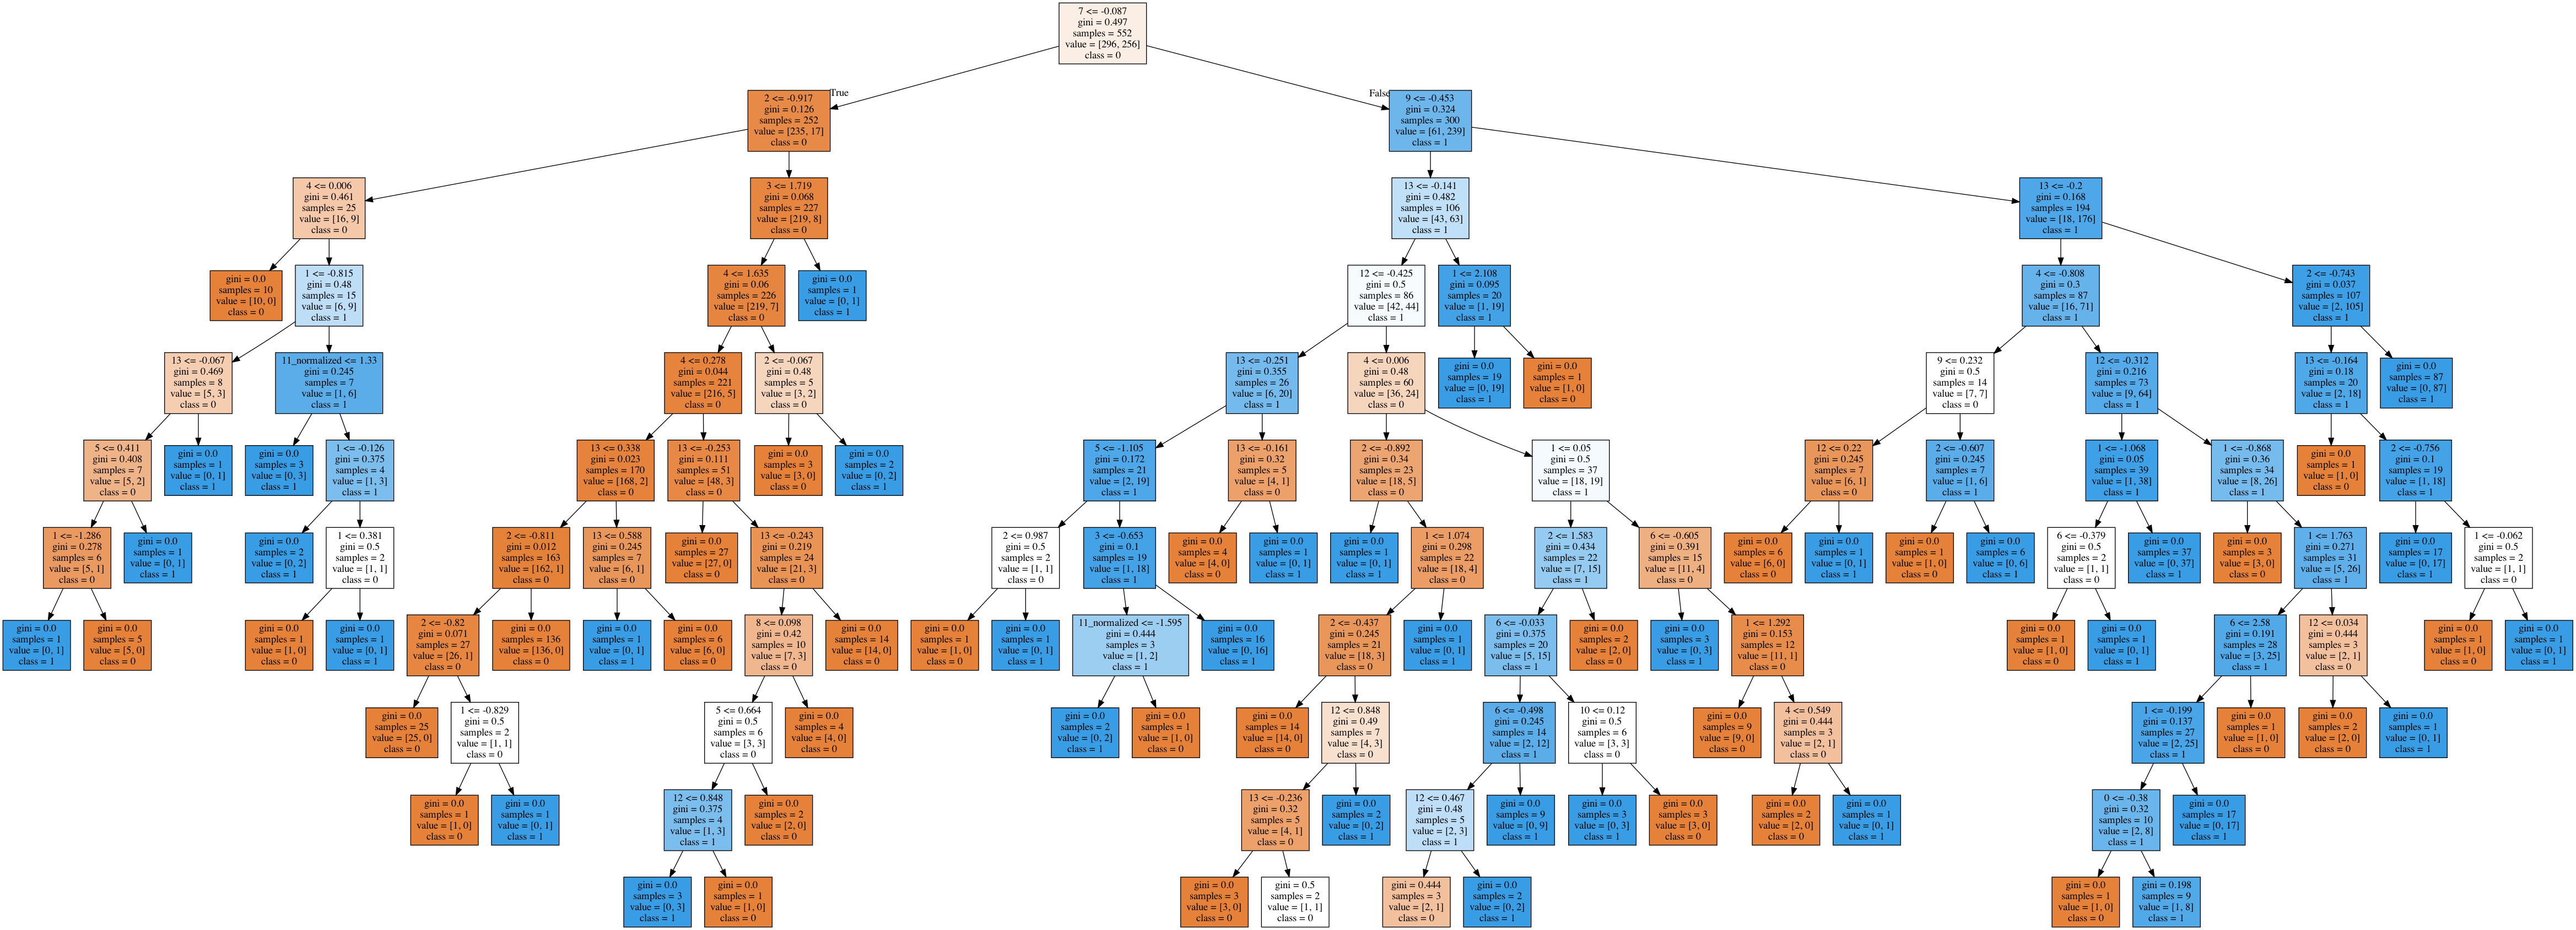

In [350]:
dot_data = tree.export_graphviz(
    model, out_file =None, feature_names=X.columns, class_names = ["0","1"], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 3. 
Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

I tried tuning the model by adding/modifying the random tree model parameters. For example, adding min_samples_leaf,
min_weight_fraction_leaf, and max_depth). Also, I found that slightly increasing the random state (from 42 to 50) pretty significantly increased this model's score. 
Also, I found that this model performs way better with more features in it. I tried removing features and it decreased  the model score, as well as recall and precision.

In [360]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth =10, random_state =50,min_samples_leaf=7,
                            min_weight_fraction_leaf=0.2)


X = scaled.drop(14, axis=1)
y = scaled[14]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8985507246376812

In [331]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        87
           1       0.86      0.86      0.86        51

    accuracy                           0.90       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.90      0.90      0.90       138



In [332]:
print(rf.feature_importances_, X.columns)

[0.0580445  0.         0.01174257 0.08038969 0.04870885 0.08867106
 0.         0.36295284 0.3005815  0.         0.03614435 0.01276465
 0.         0.        ] Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, '11_normalized'], dtype='object')


## 4. 
Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

This model turned out to have way better score with just normalized data, not the scaled one. Originally I ran the model with scaled data and it had 0.76 accuracy and when i reran it with normalized data but not scaled, its accuracy imcreased and became 0.86! So that's very interesting. Also, with the normalized data, its precision and recall significantly increased as well.

In [341]:
from xgboost import XGBClassifier

#fit model no training data
model = XGBClassifier()

X = normalized_df.drop(14, axis=1)
y = normalized_df[14]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[11:55:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/olesiamukha/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [342]:
score_new = accuracy_score(y_test, y_pred)
score_new

0.8623188405797102

In [304]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        77
           1       0.79      0.93      0.86        61

    accuracy                           0.86       138
   macro avg       0.87      0.87      0.86       138
weighted avg       0.87      0.86      0.86       138



In [305]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#ROC Curves are summaries of the trade-off between true positive and false positive rates
#ROC curves are most appropriate for balanced datasets
#precision-recall curve summarizes the trade-off between true positive rate
#and positive predictive values. These are best for imbalanced datasets
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.869810517351501


Text(0, 0.5, 'True Positive Rate')

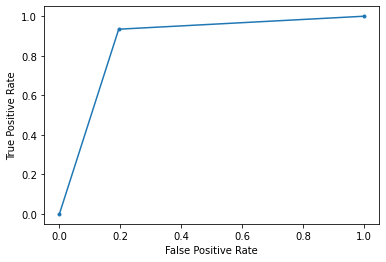

In [306]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [307]:
from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
print(f1)

auc = auc(recall, precision)
print(auc)

0.8571428571428572
0.8775392017106199


## 5. 
Which model performed best? What is your performance metric? Why? 

The random forest model performed best for me. I was mainly looking at model's score, but also at precision and recall metrics. Based on my research, the random forest model instead of searching for the most important features while splitting a node, it searches for the best feature among a random subset of features. This results in a better diversity. So as a result, it can produce a better performing model.